In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
file_path = Path("../Data/Cleaned/psych_assessment_cleaned.csv")
df = pd.read_csv(file_path)

df.shape

(9504, 11)

In [9]:
X = df.drop(columns=["condition_label"])
y = df["condition_label"]

X.shape, y.shape

((9504, 10), (9504,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((7603, 10), (1901, 10))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((7603, 10), (1901, 10))

In [12]:
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=["number"]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: []
Categorical columns: ['mood:_how_would_you_describe_your_mood_over_the_past_two_weeks', 'anxious_social_scale:_on_a_scale_of_1-10,_how_often_have_you_felt_anxious_in_social_situations_recently', 'anxiety_triggers:_have_you_experienced_any_of_the_following_anxiety_triggers_in_the_past_month', 'sleep_quality:_how_would_you_rate_the_quality_of_your_sleep_over_the_past_week', 'appetite_change:_have_you_noticed_any_significant_changes_in_your_appetite', 'lack_of_interest:_how_often_have_you_felt_a_lack_of_interest_or_pleasure_in_daily_activities', 'enjoyable_activities:_how_often_do_you_engage_in_activities_you_enjoy_or_that_help_you_relax', 'physical_anxiety_symptoms:_have_you_had_any_physical_symptoms_of_anxiety_(e.g.,_heart_palpitations,_sweating,_shortness_of_breath)', 'concentration_difficulty:_how_often_do_you_find_it_difficult_to_concentrate_on_tasks', 'coping_strategies:_what_coping_strategies_have_you_used_when_feeling_stressed_or_anxious']


In [13]:
cat_pipe = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", cat_pipe, cat_cols)
    ],
    remainder="drop"
)

In [14]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

In [15]:
pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", rf)
])

In [16]:
pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [17]:
y_pred = pipe.predict(X_test)

In [18]:
acc = accuracy_score(y_test, y_pred)
acc

0.9931614939505523

In [19]:
print(classification_report(y_test, y_pred))

                                precision    recall  f1-score   support

         Cognitive Impairments       1.00      0.98      0.99        43
         Coping and Resilience       1.00      0.38      0.55         8
              Eating Disorders       1.00      1.00      1.00        90
         General Mental Health       0.97      0.91      0.94        32
  Generalized Anxiety Disorder       1.00      1.00      1.00       275
                Mood Disorders       1.00      1.00      1.00       541
Post-Traumatic Stress Disorder       0.00      0.00      0.00         4
               Sleep Disorders       0.98      1.00      0.99       721
     Stress-Related Conditions       1.00      1.00      1.00       187

                      accuracy                           0.99      1901
                     macro avg       0.88      0.81      0.83      1901
                  weighted avg       0.99      0.99      0.99      1901



/Users/sparshashrestha/Downloads/Artificial-Intelligence-Coursework/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/sparshashrestha/Downloads/Artificial-Intelligence-Coursework/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/sparshashrestha/Downloads/Artificial-Intelligence-Coursework/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 

In [20]:
cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)
cm

array([[ 42,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   3,   0,   0,   0,   0,   0,   5,   0],
       [  0,   0,  90,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  29,   0,   0,   0,   3,   0],
       [  0,   0,   0,   0, 275,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 541,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   3,   0],
       [  0,   0,   0,   0,   0,   0,   0, 721,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 187]])

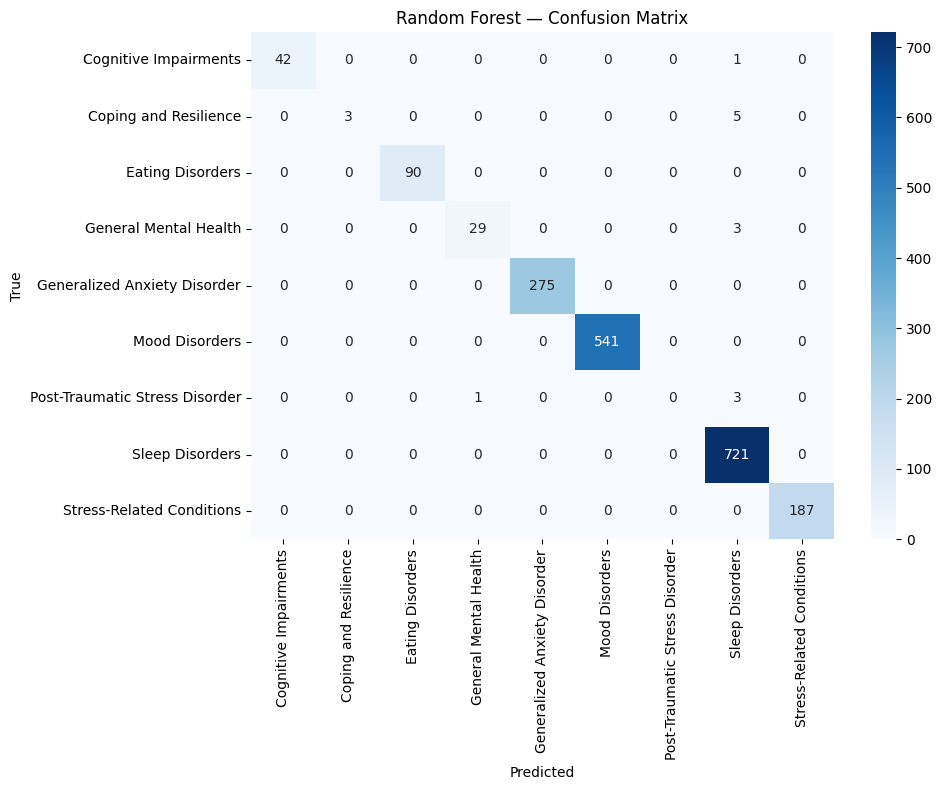

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=pipe.classes_,
    yticklabels=pipe.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest — Confusion Matrix")
plt.tight_layout()
plt.show()

In [22]:
pred_df = X_test.copy()
pred_df["true_label"] = y_test.values
pred_df["pred_label"] = y_pred

out_path = Path("../Outputs/Predictions/rf_predictions.csv")
out_path.parent.mkdir(parents=True, exist_ok=True)
pred_df.to_csv(out_path, index=False)

out_path

PosixPath('../Outputs/Predictions/rf_predictions.csv')

In [23]:
model_path = Path("../models/random_forest_pipeline.joblib")
model_path.parent.mkdir(parents=True, exist_ok=True)
joblib.dump(pipe, model_path)

model_path

PosixPath('../models/random_forest_pipeline.joblib')

In [24]:
# Get feature names after preprocessing
feature_names = pipe.named_steps["preprocess"].get_feature_names_out()
importances = pipe.named_steps["model"].feature_importances_

fi = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

fi.head(20)

,feature,importance
2,cat__mood:_how_would_you_describe_your_mood_ov...,0.057470
1,cat__mood:_how_would_you_describe_your_mood_ov...,0.054509
7,"cat__anxious_social_scale:_on_a_scale_of_1-10,...",0.052221
53,cat__coping_strategies:_what_coping_strategies...,0.050778
16,"cat__anxious_social_scale:_on_a_scale_of_1-10,...",0.046866
19,cat__anxiety_triggers:_have_you_experienced_an...,0.040375
27,cat__sleep_quality:_how_would_you_rate_the_qua...,0.035242
26,cat__sleep_quality:_how_would_you_rate_the_qua...,0.033967
45,cat__physical_anxiety_symptoms:_have_you_had_a...,0.033805
31,cat__appetite_change:_have_you_noticed_any_sig...,0.030800
